# MFG Class: Customer Forecasting

<br>

---

<br>

In this session, we're going to look at rudimentary methods of forecasting using a small dataset. There are 4 data entry points:

1. forecasted
2. ordered
3. scheduled
4. produced

**TIME LINE**

* Simple forecast w/ rolled up data
  * week 1
* More complex forecase w/ product data (+ whatever else)
  * week 2
* Product Wheel Optimization w/ the forecasted
  * weeks 3-4
  * which line to produce one, what bucket sizes
  * need transition times, product/line pairs (required and preferred)
  * production rates, deckle rates

**TO DO**

* EDA
  * display datapoints in sideby plot
* Model
  * role in company, company + tech, company + product

<br>

---

<br>

<a name='top'></a>

# Contents

* 1.0 [Preparing Environment and Importing Data](#x.0)
  * 1.0.1 [Import Packages](#x.0.1)
  * 1.0.2 [Load Dataset](#x.0.2)
* 1.1 [Exploratory Data Analysis](#x.1)
  * 1.1.1 [Interactive Monthly](#x.1.1)
  * 1.1.2 [Interactive Monthly With Groupby](#x.1.2)
* 1.2 [Modeling](#x.2)
  * 1.2.1 [Symbolic Models](#x.2.1)
    * 1.2.1.1 [3 mo. Rule-Based](#x.2.1.1)
    * 1.2.1.2 [6 mo. Rule-Based](#x.2.1.2)
  * 1.2.2 [Random Forest](#x.2.2)
    * 1.2.2.1 [3 mo. Forest](#x.2.2.1)
    * 1.2.2.2 [6 mo. Forest](#x.2.2.2)
* 1.3 [Pipeline](#x.3)
<br>



---

<a name='x.0'></a>

## 1.0 Preparing Environment and Importing Data

[back to top](#top)

<a name='x.0.1'></a>

### 1.0.1 Import Packages

[back to top](#top)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from ipywidgets import interact, interactive, widgets
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import r2_score
from scipy.stats import mode

<a name='x.0.2'></a>

### 1.0.2 Load Dataset

[back to top](#top)

In [ ]:
# Sync your google drive folder
from google.colab import drive
drive.mount("/content/drive")

In [3]:
stnc = pd.read_excel("/content/drive/MyDrive/mfganalytic/mfg_product_wheel/data/"\
                   "STNC_FC 033121.xlsx", header=0, 
                   sheet_name='Sheet1')
stnc.head()

,Level Number,Item,Item Description,Plant,Other Attribute,Manufacturing Line,Technology,Market Segment,Market Sub Segment,Product Line,Customer Name,Customer Number,Customer Group,Customer Type,Ship To,Coutry,Sales Rep,Sales Manager,Price Type,Square Meters,KG Factor,LB factor,Material Cost,VOH Cost,FOH Cost,Labor Cost,Outside Processing,KG 07/2021,KG 08/2021,KG 09/2021,KG 10/2021,KG 11/2021,KG 12/2021,KG 01/2022,KG 02/2022,KG 03/2022,KG 04/2022,KG 05/2022,KG 06/2022,ASP 07/2021,...,DL 03/2022,DL 04/2022,DL 05/2022,DL 06/2022,VOH 07/2021,VOH 08/2021,VOH 09/2021,VOH 10/2021,VOH 11/2021,VOH 12/2021,VOH 01/2022,VOH 02/2022,VOH 03/2022,VOH 04/2022,VOH 05/2022,VOH 06/2022,FOH 07/2021,FOH 08/2021,FOH 09/2021,FOH 10/2021,FOH 11/2021,FOH 12/2021,FOH 01/2022,FOH 02/2022,FOH 03/2022,FOH 04/2022,FOH 05/2022,FOH 06/2022,User Forecast Array 03 07/2021,User Forecast Array 03 08/2021,User Forecast Array 03 09/2021,User Forecast Array 03 10/2021,User Forecast Array 03 11/2021,User Forecast Array 03 12/2021,User Forecast Array 03 01/2022,User Forecast Array 03 02/2022,User Forecast Array 03 03/2022,User Forecast Array 03 04/2022,User Forecast Array 03 05/2022,User Forecast Array 03 06/2022
0,1.0,1429923,SS30120UN1956 WHITE 6,STNC,355055_355055,SPM374013,SPM374013,Specialty Filtration,SFT FILTRATION,SFTFL AIR,HOLLINGSWORTH AND VOSE AIR FILTRATION,355055.0,HOLLINGSWORTH AND VOSE,TRADE,355055.0,US,THOMAS OLSEN,960*Keith Misukanis - SPEC,Fixed,1.956,0.02345,0.05170,0.04,0.01,0.0,0.00,0.0,4396.755353,645.28186,1205.439843,2083.333333,2082.81263,2072.622348,1666.639857,1666.602573,1666.644004,0.000000,0.000000,0.000000,0.06638,...,0.00000,0,0,0,43.967554,6.452819,12.054398,20.833333,20.828126,20.726223,16.666399,16.666026,16.66644,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,187494.8978,27517.35009,51404.68415,88841.50675,88819.30192,88384.74831,71072.06214,71070.47219,71072.23899,0.0000,0.0000,0.0000
1,1.0,1429924,SS30120UN2108 WHITE 6,STNC,355055_355055,SPM374013,SPM374013,Specialty Filtration,SFT FILTRATION,SFTFL AIR,HOLLINGSWORTH AND VOSE AIR FILTRATION,355055.0,HOLLINGSWORTH AND VOSE,TRADE,355055.0,US,THOMAS OLSEN,960*Keith Misukanis - SPEC,Fixed,2.108,0.02531,0.05580,0.04,0.03,0.0,0.01,0.0,4396.755354,645.28186,1205.439844,2083.333333,2082.81263,2072.622348,1666.639857,1666.602573,1666.644004,0.000000,0.000000,0.000000,0.07152,...,16.66644,0,0,0,131.902661,19.358456,36.163195,62.500000,62.484379,62.178670,49.999196,49.998077,49.99932,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,173716.1341,25495.13471,47627.01871,82312.65639,82292.08338,81889.46456,65849.06587,65847.59275,65849.22972,0.0000,0.0000,0.0000
2,1.0,1429932,SS30150UN0292 WHITE 6,STNC,354822_354822,SPM374013,SPM374013,Hygiene Nonwoven,HYN ADULT INCONTINENCE,HYNAI TOPSHEET,ESSITY CANADA INC,354822.0,ESSITY,TRADE,354822.0,CA,Dianna Hardee,419*Michelle Wilson - HYG,Fixed,0.292,0.00438,0.00965,0.01,0.00,0.0,0.00,0.0,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,4112.426036,3289.940828,3289.940828,4112.426036,3289.940828,3289.940828,0.00000,...,0.00000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,938910.05380,751128.04300,751128.04300,938910.0538,751128.0430,751128.0430
3,1.0,1429933,SS30150UN2032 WHITE 6,STNC,355055_355055,SPM374013,SPM374013,Specialty Filtration,SFT FILTRATION,SFTFL AIR,HOLLINGSWORTH AND VOSE AIR FILTRATION,355055.0,HOLLINGSWORTH AND VOSE,TRADE,355055.0,US,THOMAS OLSEN,960*Keith Misukanis - SPEC,Fixed,2.032,0.03045,0.06714,0.05,0.02,0.0,0.00,0.0,4396.755355,645.28186,1205.439843,2083.333333,2082.81263,2072.622348,1666.639857,1666.602573,1666.644005,0.000000,0.000000,0.000000,0.11690,...,0.00000,0,0,0,87.935107,12.905637,24.108797,41.666667,41.656253,41.452447,33.332797,33.332051,33.33288,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,144392.6225,21191.52248,39587.51538,68418.17186,68401.07160,68066.41536,54733.65706,54732.43261,54733.79326,0.0000,0.0000,0.0000
4,1.0,1429

In [4]:
wava = pd.read_excel("/content/drive/MyDrive/mfganalytic/mfg_product_wheel/data/"\
                   "WAVA_FC_033121.xlsx", header=0, 
                   sheet_name='Sheet1')
wava.head()

,Level Number,Item,Item Description,Plant,Other Attribute,Manufacturing Line,Technology,Market Segment,Market Sub Segment,Product Line,Customer Name,Customer Number,Customer Group,Customer Type,Ship To,Coutry,Sales Rep,Sales Manager,Price Type,Square Meters,KG Factor,LB factor,Material Cost,VOH Cost,FOH Cost,Labor Cost,Outside Processing,KG 07/2021,KG 08/2021,KG 09/2021,KG 10/2021,KG 11/2021,KG 12/2021,KG 01/2022,KG 02/2022,KG 03/2022,KG 04/2022,KG 05/2022,KG 06/2022,ASP 07/2021,...,DL 03/2022,DL 04/2022,DL 05/2022,DL 06/2022,VOH 07/2021,VOH 08/2021,VOH 09/2021,VOH 10/2021,VOH 11/2021,VOH 12/2021,VOH 01/2022,VOH 02/2022,VOH 03/2022,VOH 04/2022,VOH 05/2022,VOH 06/2022,FOH 07/2021,FOH 08/2021,FOH 09/2021,FOH 10/2021,FOH 11/2021,FOH 12/2021,FOH 01/2022,FOH 02/2022,FOH 03/2022,FOH 04/2022,FOH 05/2022,FOH 06/2022,User Forecast Array 03 07/2021,User Forecast Array 03 08/2021,User Forecast Array 03 09/2021,User Forecast Array 03 10/2021,User Forecast Array 03 11/2021,User Forecast Array 03 12/2021,User Forecast Array 03 01/2022,User Forecast Array 03 02/2022,User Forecast Array 03 03/2022,User Forecast Array 03 04/2022,User Forecast Array 03 05/2022,User Forecast Array 03 06/2022
0,1.0,1429770,15.5 GSM 590 MM WHITE,WAVA,354518_354518,SPM375013,SPM375013,Hygiene Nonwoven,HYN CHILD CARE,HYNCC BACKSHEET,ASSOCIATED HYGIENIC PRODUCTS,354518.0,DOMTAR ABSORBENT PRODUCTS,TRADE,354518.0,NaN,Dianna Hardee,419*Michelle Wilson - HYG,Fixed,0.590,0.00914,0.02014,0.02,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1758.126852,1397.609706,1397.609706,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.000000e+00,0.00000,0.00000,0.00000,0.0,0.0,0.0,192355.2355,152911.3464,152911.3464
1,1.0,1429860,13.5 GSM 265 MM TAN,WAVA,354518_354518,SPM375013,SPM375013,Hygiene Nonwoven,HYN CHILD CARE,HYNCC BACKSHEET,ASSOCIATED HYGIENIC PRODUCTS,354518.0,DOMTAR ABSORBENT PRODUCTS,TRADE,354518.0,NaN,Dianna Hardee,419*Michelle Wilson - HYG,Fixed,0.265,0.00357,0.00788,0.01,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1758.126852,1397.609707,1397.609707,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.000000e+00,0.00000,0.00000,0.00000,0.0,0.0,0.0,492472.5076,391487.3128,391487.3128
2,1.0,1462604,0.70 OSY 7.5 YELLOW,WAVA,204472_204472,SPM375006,SPM375006,Healthcare Nonwoven,HCN INFECTION CONTROL,HCNIC FACEMASK,ASPEN SURGICAL PRODUCTS,204472.0,PRECEPT MEDICAL,TRADE,204472.0,US,Pat Mahoney,330*Fernando Marin - HC,Fixed,0.191,0.00448,0.00989,0.01,0.0,0.0,0.0,0.0,716.915452,1393.140555,1693.291778,1300.222086,1128.861185,1128.861185,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.01953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,160025.77060,310968.87380,3.779669e+05,290228.14430,251977.94310,251977.94310,0.0,0.0,0.0,0.0000,0.0000,0.0000
3,1.0,1429498,0.70 OSY 3.67 LIGHT BLUE,WAVA,204472_204472,SPM375006,SPM375006,Healthcare Nonwoven,HCN INFECTION CONTROL,HCNIC FACEMASK,ASPEN SURGICAL PRODUCTS,204472.0,PRECEPT MEDICAL,TRADE,204472.0,US,Pat Mahoney,330*Fernando Marin - HC,Fixed,0.093,0.00218,0.00481,0.00,0.0,0.0,0.0,0.0,67.270951,130.723355,158.887617,122.004869,105.925078,105.925078,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,30858.23429,59964.84187,7.288423e+04,55965.53631,48589.48528,48589.48528,0.0,0.0,0.0,0.0000,0.0000,0.0000
4,1.0,1429500,0.70 OSY 7.5 LIGHT BLUE,WAVA,204472_204472,SPM375006,SPM375006,Healthcare Nonwoven,HCN INFECTION CONTROL,HCNIC FACEMASK,ASPEN SURGICAL PRODUCTS,204472.0,PRECEPT MEDICAL,TRADE,204472.0,US,Pat Mahoney,330*Fernando Marin - HC,Fixed,0.191,0.00448,0.00989,0.01,0.0,0.0,0.0,0.0,2241.995929,4356.734271,5295.389828,4066.159566,3530.259884,3530.259884,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.01865,...,0.0,0

In [5]:
monc = pd.read_excel("/content/drive/MyDrive/mfganalytic/mfg_product_wheel/data/"\
                   "MONC_FC.xlsx", header=0, 
                   sheet_name='Sheet1')
monc.head()

,Level Number,Item,Item Description,Plant,Other Attribute,Manufacturing Line,Technology,Market Segment,Market Sub Segment,Product Line,Customer Name,Customer Number,Customer Group,Customer Type,Ship To,Coutry,Sales Rep,Sales Manager,Price Type,Square Meters,KG Factor,LB factor,Material Cost,VOH Cost,FOH Cost,Labor Cost,Outside Processing,KG 07/2021,KG 08/2021,KG 09/2021,KG 10/2021,KG 11/2021,KG 12/2021,KG 01/2022,KG 02/2022,KG 03/2022,KG 04/2022,KG 05/2022,KG 06/2022,ASP 07/2021,...,DL 03/2022,DL 04/2022,DL 05/2022,DL 06/2022,VOH 07/2021,VOH 08/2021,VOH 09/2021,VOH 10/2021,VOH 11/2021,VOH 12/2021,VOH 01/2022,VOH 02/2022,VOH 03/2022,VOH 04/2022,VOH 05/2022,VOH 06/2022,FOH 07/2021,FOH 08/2021,FOH 09/2021,FOH 10/2021,FOH 11/2021,FOH 12/2021,FOH 01/2022,FOH 02/2022,FOH 03/2022,FOH 04/2022,FOH 05/2022,FOH 06/2022,User Forecast Array 03 07/2021,User Forecast Array 03 08/2021,User Forecast Array 03 09/2021,User Forecast Array 03 10/2021,User Forecast Array 03 11/2021,User Forecast Array 03 12/2021,User Forecast Array 03 01/2022,User Forecast Array 03 02/2022,User Forecast Array 03 03/2022,User Forecast Array 03 04/2022,User Forecast Array 03 05/2022,User Forecast Array 03 06/2022
0,1.0,1430385,0022-138N 1.5oz 19 UN 4800LY,MONC,113693_113693,SPM369004,SPM369004,Specialty Home & Bedding,SHB HOME AND BEDDING,SHBHB BEDDING AND FURNITURE,LEGGETT & PLATT INCORPORATED,113693.0,LEGGETT & PLATT,TRADE,113693.0,US,Greg Rabon,354*Michelle Wilson - SPEC,Fixed,0.4826,0.02454,0.05410,0.05,0.01,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.03940,...,0.000000,0.0,0.0,0.0,0.000,0.00000,0.00000,0.0,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000e+00,0.000000e+00,0.000,0.000,0.000,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
1,1.0,1430493,0128-003N 1.18oz 82 UN 5000LY,MONC,301867_301867,SPM369004,SPM369004,Specialty Home & Bedding,SHB HOME AND BEDDING,SHBHB BEDDING AND FURNITURE,HANES INDUSTRIES,301867.0,HANES CONVERTING COMPANY,TRADE,301867.0,US,Greg Rabon,354*Michelle Wilson - SPEC,Fixed,2.0828,0.08326,0.18355,0.15,0.04,0.0,0.01,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,261.363637,170.454545,170.454545,0.0,0.0,0.0,0.14512,...,1.704545,0.0,0.0,0.0,0.000,0.00000,0.00000,0.0,0.00000,0.00000,10.454545,6.818182,6.818182,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000e+00,0.000000e+00,0.000,0.000,0.000,0.000,3.139126e+03,2.047256e+03,2.047256e+03,0.0,0.0,0.0
2,1.0,1430529,0145-008N 1oz 120 UV 4000LY,MONC,354604_354604,SPM369002,SPM369002,Specialty Other Construction,SOC OTHER CONSTRUCTION,SOCOC LANDSCAPE,DALEN PRODUCTS (PARENT),354604.0,DALEN PRODUCTS (PARENT),TRADE,354604.0,US,Keith Misukanis,Fernando Marin - SPEC,Fixed,3.0480,0.10326,0.22764,0.15,0.06,0.0,0.03,0.0,60.083333,60.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,3.605,3.60500,0.00000,0.0,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,5.818646e+02,5.818646e+02,0.000,0.000,0.000,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
3,1.0,1430568,0250-001N 17GSM 21 PL 9100LY,MONC,354764_354764,SPM369005,SPM369005,Specialty Other Industrial,SOI OTHER INDUSTRIAL,SOIOI SORBENTS,NOVIPAX BUYER LLC,354764.0,NOVIPAX BUYER LLC,TRADE,354764.0,US,Greg Rabon,354*Michelle Wilson - SPEC,Fixed,0.5334,0.00912,0.02010,0.02,0.01,0.0,0.00,0.0,13919.999996,9859.941998,9859.941998,13050.000003,9859.941998,9859.941998,12999.999996,10499.999996,10499.999996,0.0,0.0,0.0,0.03516,...,0.000000,0.0,0.0,0.0,139.200,98.59942,98.59942,130.5,98.59942,98.59942,130.000000,105.000000,105.000000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1.526316e+06,1.081134e+06,1081133.991,1430921.053,1081133.991,1081133.991,1.425439e+06,1.151316e+06,1.151316e+06,0.0,0.0,0.0
4,1.0,1430569,0250-002N 17GSM 14 PL 9100LY,MONC,354764_354764,SPM369005,SPM369005,Specialty Other Industrial,SOI OTHER INDUSTRIAL,SOIOI SORBENTS,NOVIPAX BU

In [4]:
stnc = pd.read_excel("data/"\
                   "STNC_FC 033121.xlsx", header=0, 
                   sheet_name='Sheet1')
stnc.head()

,Level Number,Item,Item Description,Plant,Other Attribute,Manufacturing Line,Technology,Market Segment,Market Sub Segment,Product Line,...,User Forecast Array 03 09/2021,User Forecast Array 03 10/2021,User Forecast Array 03 11/2021,User Forecast Array 03 12/2021,User Forecast Array 03 01/2022,User Forecast Array 03 02/2022,User Forecast Array 03 03/2022,User Forecast Array 03 04/2022,User Forecast Array 03 05/2022,User Forecast Array 03 06/2022
0,1.0,1429923,SS30120UN1956 WHITE 6,STNC,355055_355055,SPM374013,SPM374013,Specialty Filtration,SFT FILTRATION,SFTFL AIR,...,51404.68415,88841.50675,88819.30192,88384.74831,71072.06214,71070.47219,71072.23899,0.0000,0.0000,0.0000
1,1.0,1429924,SS30120UN2108 WHITE 6,STNC,355055_355055,SPM374013,SPM374013,Specialty Filtration,SFT FILTRATION,SFTFL AIR,...,47627.01871,82312.65639,82292.08338,81889.46456,65849.06587,65847.59275,65849.22972,0.0000,0.0000,0.0000
2,1.0,1429932,SS30150UN0292 WHITE 6,STNC,354822_354822,SPM374013,SPM374013,Hygiene Nonwoven,HYN ADULT INCONTINENCE,HYNAI TOPSHEET,...,0.00000,0.00000,0.00000,0.00000,938910.05380,751128.04300,751128.04300,938910.0538,751128.0430,751128.0430
3,1.0,1429933,SS30150UN2032 WHITE 6,STNC,355055_355055,SPM374013,SPM374013,Specialty Filtration,SFT FILTRATION,SFTFL AIR,...,39587.51538,68418.17186,68401.07160,68066.41536,54733.65706,54732.43261,54733.79326,0.0000,0.0000,0.0000
4,1.0,1429936,SS30150UN0540 WHITE 6,STNC,354821_354821,SPM374013,SPM374013,Hygiene Nonwoven,HYN ADULT INCONTINENCE,HYNAI BACKSHEET,...,0.00000,0.00000,0.00000,0.00000,508334.49140,406667.59310,406667.59310,508334.4914,406667.5931,406667.5931


In [5]:
wava = pd.read_excel("data/"\
                   "WAVA_FC_033121.xlsx", header=0, 
                   sheet_name='Sheet1')
wava.head()

,Level Number,Item,Item Description,Plant,Other Attribute,Manufacturing Line,Technology,Market Segment,Market Sub Segment,Product Line,...,User Forecast Array 03 09/2021,User Forecast Array 03 10/2021,User Forecast Array 03 11/2021,User Forecast Array 03 12/2021,User Forecast Array 03 01/2022,User Forecast Array 03 02/2022,User Forecast Array 03 03/2022,User Forecast Array 03 04/2022,User Forecast Array 03 05/2022,User Forecast Array 03 06/2022
0,1.0,1429770,15.5 GSM 590 MM WHITE,WAVA,354518_354518,SPM375013,SPM375013,Hygiene Nonwoven,HYN CHILD CARE,HYNCC BACKSHEET,...,0.000000e+00,0.00000,0.00000,0.00000,0.0,0.0,0.0,192355.2355,152911.3464,152911.3464
1,1.0,1429860,13.5 GSM 265 MM TAN,WAVA,354518_354518,SPM375013,SPM375013,Hygiene Nonwoven,HYN CHILD CARE,HYNCC BACKSHEET,...,0.000000e+00,0.00000,0.00000,0.00000,0.0,0.0,0.0,492472.5076,391487.3128,391487.3128
2,1.0,1462604,0.70 OSY 7.5 YELLOW,WAVA,204472_204472,SPM375006,SPM375006,Healthcare Nonwoven,HCN INFECTION CONTROL,HCNIC FACEMASK,...,3.779669e+05,290228.14430,251977.94310,251977.94310,0.0,0.0,0.0,0.0000,0.0000,0.0000
3,1.0,1429498,0.70 OSY 3.67 LIGHT BLUE,WAVA,204472_204472,SPM375006,SPM375006,Healthcare Nonwoven,HCN INFECTION CONTROL,HCNIC FACEMASK,...,7.288423e+04,55965.53631,48589.48528,48589.48528,0.0,0.0,0.0,0.0000,0.0000,0.0000
4,1.0,1429500,0.70 OSY 7.5 LIGHT BLUE,WAVA,204472_204472,SPM375006,SPM375006,Healthcare Nonwoven,HCN INFECTION CONTROL,HCNIC FACEMASK,...,1.182007e+06,907624.90310,788004.43840,788004.43840,0.0,0.0,0.0,0.0000,0.0000,0.0000


In [6]:
monc = pd.read_excel("data/"\
                   "MONC_FC.xlsx", header=0, 
                   sheet_name='Sheet1')
monc.head()

,Level Number,Item,Item Description,Plant,Other Attribute,Manufacturing Line,Technology,Market Segment,Market Sub Segment,Product Line,...,User Forecast Array 03 09/2021,User Forecast Array 03 10/2021,User Forecast Array 03 11/2021,User Forecast Array 03 12/2021,User Forecast Array 03 01/2022,User Forecast Array 03 02/2022,User Forecast Array 03 03/2022,User Forecast Array 03 04/2022,User Forecast Array 03 05/2022,User Forecast Array 03 06/2022
0,1.0,1430385,0022-138N 1.5oz 19 UN 4800LY,MONC,113693_113693,SPM369004,SPM369004,Specialty Home & Bedding,SHB HOME AND BEDDING,SHBHB BEDDING AND FURNITURE,...,0.000,0.000,0.000,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
1,1.0,1430493,0128-003N 1.18oz 82 UN 5000LY,MONC,301867_301867,SPM369004,SPM369004,Specialty Home & Bedding,SHB HOME AND BEDDING,SHBHB BEDDING AND FURNITURE,...,0.000,0.000,0.000,0.000,3.139126e+03,2.047256e+03,2.047256e+03,0.0,0.0,0.0
2,1.0,1430529,0145-008N 1oz 120 UV 4000LY,MONC,354604_354604,SPM369002,SPM369002,Specialty Other Construction,SOC OTHER CONSTRUCTION,SOCOC LANDSCAPE,...,0.000,0.000,0.000,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
3,1.0,1430568,0250-001N 17GSM 21 PL 9100LY,MONC,354764_354764,SPM369005,SPM369005,Specialty Other Industrial,SOI OTHER INDUSTRIAL,SOIOI SORBENTS,...,1081133.991,1430921.053,1081133.991,1081133.991,1.425439e+06,1.151316e+06,1.151316e+06,0.0,0.0,0.0
4,1.0,1430569,0250-002N 17GSM 14 PL 9100LY,MONC,354764_354764,SPM369005,SPM369005,Specialty Other Industrial,SOI OTHER INDUSTRIAL,SOIOI SORBENTS,...,1621796.381,2146381.579,1621796.381,1621796.381,2.138158e+06,1.726974e+06,1.726974e+06,0.0,0.0,0.0


In [7]:
df = pd.concat([stnc, wava, monc])
df.reset_index(drop=True)

,Level Number,Item,Item Description,Plant,Other Attribute,Manufacturing Line,Technology,Market Segment,Market Sub Segment,Product Line,...,User Forecast Array 03 09/2021,User Forecast Array 03 10/2021,User Forecast Array 03 11/2021,User Forecast Array 03 12/2021,User Forecast Array 03 01/2022,User Forecast Array 03 02/2022,User Forecast Array 03 03/2022,User Forecast Array 03 04/2022,User Forecast Array 03 05/2022,User Forecast Array 03 06/2022
0,1.0,1429923,SS30120UN1956 WHITE 6,STNC,355055_355055,SPM374013,SPM374013,Specialty Filtration,SFT FILTRATION,SFTFL AIR,...,51404.68415,88841.50675,88819.30192,88384.74831,71072.06214,71070.47219,71072.23899,0.0000,0.0000,0.0000
1,1.0,1429924,SS30120UN2108 WHITE 6,STNC,355055_355055,SPM374013,SPM374013,Specialty Filtration,SFT FILTRATION,SFTFL AIR,...,47627.01871,82312.65639,82292.08338,81889.46456,65849.06587,65847.59275,65849.22972,0.0000,0.0000,0.0000
2,1.0,1429932,SS30150UN0292 WHITE 6,STNC,354822_354822,SPM374013,SPM374013,Hygiene Nonwoven,HYN ADULT INCONTINENCE,HYNAI TOPSHEET,...,0.00000,0.00000,0.00000,0.00000,938910.05380,751128.04300,751128.04300,938910.0538,751128.0430,751128.0430
3,1.0,1429933,SS30150UN2032 WHITE 6,STNC,355055_355055,SPM374013,SPM374013,Specialty Filtration,SFT FILTRATION,SFTFL AIR,...,39587.51538,68418.17186,68401.07160,68066.41536,54733.65706,54732.43261,54733.79326,0.0000,0.0000,0.0000
4,1.0,1429936,SS30150UN0540 WHITE 6,STNC,354821_354821,SPM374013,SPM374013,Hygiene Nonwoven,HYN ADULT INCONTINENCE,HYNAI BACKSHEET,...,0.00000,0.00000,0.00000,0.00000,508334.49140,406667.59310,406667.59310,508334.4914,406667.5931,406667.5931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,1.0,1834309,9030-102N 42GSM 2200MM UN,MONC,370625_370625,SPM369005,SPM369005,Specialty Other Construction,SOC OTHER CONSTRUCTION,SOCOC GEOTEXTILES,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
3896,1.0,1837118,9020-102N .75 OSY 32 UN 8200,MONC,354738_354738,SPM369005,SPM369005,Specialty Filtration,SFT FILTRATION,SFTFL OTHER,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
3897,1.0,1837116,9020-100N .75 OSY 28 UN 8200,MONC,354738_354738,SPM369005,SPM369005,Specialty Filtration,SFT FILTRATION,SFTFL OTHER,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
3898,1.0,1837117,9020-101N .75 OSY 67 UN 8200,MONC,354738_354738,SPM369005,SPM369005,Specialty Filtration,SFT FILTRATION,SFTFL OTHER,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000


<a name='x.1'></a>

## 1.1 Exploratory Data Analysis

[back to top](#top)

In [8]:
df[[col for col in df.columns if ('KG' in col) and ('20' in col)]]

,KG 07/2021,KG 08/2021,KG 09/2021,KG 10/2021,KG 11/2021,KG 12/2021,KG 01/2022,KG 02/2022,KG 03/2022,KG 04/2022,KG 05/2022,KG 06/2022
0,4396.755353,645.28186,1205.439843,2083.333333,2082.81263,2072.622348,1666.639857,1666.602573,1666.644004,0.000000,0.000000,0.000000
1,4396.755354,645.28186,1205.439844,2083.333333,2082.81263,2072.622348,1666.639857,1666.602573,1666.644004,0.000000,0.000000,0.000000
2,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,4112.426036,3289.940828,3289.940828,4112.426036,3289.940828,3289.940828
3,4396.755355,645.28186,1205.439843,2083.333333,2082.81263,2072.622348,1666.639857,1666.602573,1666.644005,0.000000,0.000000,0.000000
4,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,4112.426035,3289.940828,3289.940828,4112.426035,3289.940828,3289.940828
...,...,...,...,...,...,...,...,...,...,...,...,...
1373,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1374,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1375,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1376,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
qty = [col for col in df.columns if ('KG' in col) and ('20' in col)]

In [10]:
df.shape

(3900, 111)

In [11]:
df.Item.nunique()

2897

In [12]:
df = df.loc[(df[qty] > 0).any(axis=1)]

In [13]:
desc = ['Item', 'Manufacturing Line', 'Technology', 'Market Segment', 
        'Product Line', 'Customer Name', 'Customer Number', 'Customer Group', 'Plant']

In [14]:
df[desc].nunique()

Item                  1385
Manufacturing Line      18
Technology              16
Market Segment          11
Product Line            58
Customer Name          106
Customer Number        117
Customer Group          83
Plant                    3
dtype: int64

In [ ]:
desc.remove('Technology')

In [17]:
df.head()

,Level Number,Item,Item Description,Plant,Other Attribute,Manufacturing Line,Technology,Market Segment,Market Sub Segment,Product Line,...,User Forecast Array 03 09/2021,User Forecast Array 03 10/2021,User Forecast Array 03 11/2021,User Forecast Array 03 12/2021,User Forecast Array 03 01/2022,User Forecast Array 03 02/2022,User Forecast Array 03 03/2022,User Forecast Array 03 04/2022,User Forecast Array 03 05/2022,User Forecast Array 03 06/2022
0,1.0,1429923,SS30120UN1956 WHITE 6,STNC,355055_355055,SPM374013,SPM374013,Specialty Filtration,SFT FILTRATION,SFTFL AIR,...,51404.68415,88841.50675,88819.30192,88384.74831,71072.06214,71070.47219,71072.23899,0.0000,0.0000,0.0000
1,1.0,1429924,SS30120UN2108 WHITE 6,STNC,355055_355055,SPM374013,SPM374013,Specialty Filtration,SFT FILTRATION,SFTFL AIR,...,47627.01871,82312.65639,82292.08338,81889.46456,65849.06587,65847.59275,65849.22972,0.0000,0.0000,0.0000
2,1.0,1429932,SS30150UN0292 WHITE 6,STNC,354822_354822,SPM374013,SPM374013,Hygiene Nonwoven,HYN ADULT INCONTINENCE,HYNAI TOPSHEET,...,0.00000,0.00000,0.00000,0.00000,938910.05380,751128.04300,751128.04300,938910.0538,751128.0430,751128.0430
3,1.0,1429933,SS30150UN2032 WHITE 6,STNC,355055_355055,SPM374013,SPM374013,Specialty Filtration,SFT FILTRATION,SFTFL AIR,...,39587.51538,68418.17186,68401.07160,68066.41536,54733.65706,54732.43261,54733.79326,0.0000,0.0000,0.0000
4,1.0,1429936,SS30150UN0540 WHITE 6,STNC,354821_354821,SPM374013,SPM374013,Hygiene Nonwoven,HYN ADULT INCONTINENCE,HYNAI BACKSHEET,...,0.00000,0.00000,0.00000,0.00000,508334.49140,406667.59310,406667.59310,508334.4914,406667.5931,406667.5931


<AxesSubplot:ylabel='Customer Name'>

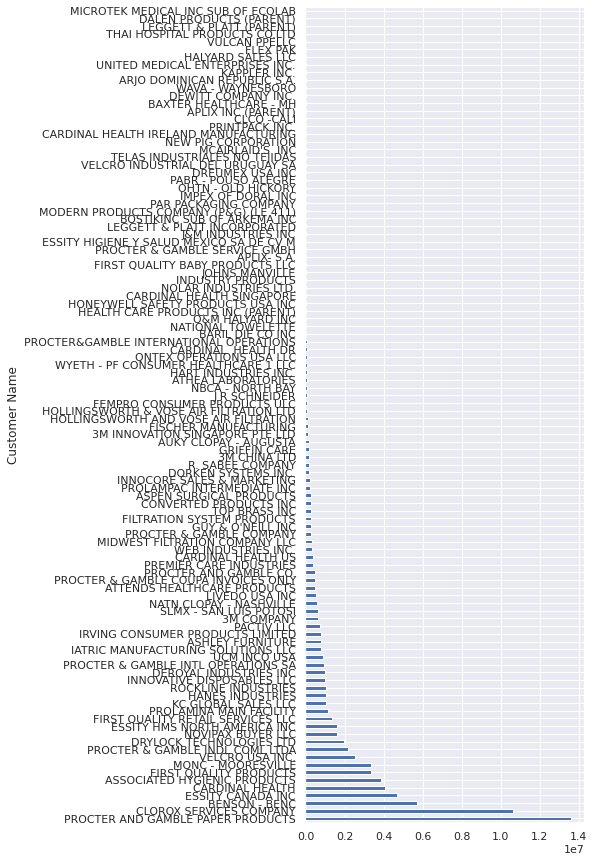

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(5,15))
df.groupby('Customer Name')[qty].sum().sum(axis=1).sort_values(ascending=False)\
  .plot.barh(ax=ax)

In [19]:
df.loc[(df[qty] < 0).any(axis=1)]

,Level Number,Item,Item Description,Plant,Other Attribute,Manufacturing Line,Technology,Market Segment,Market Sub Segment,Product Line,...,User Forecast Array 03 09/2021,User Forecast Array 03 10/2021,User Forecast Array 03 11/2021,User Forecast Array 03 12/2021,User Forecast Array 03 01/2022,User Forecast Array 03 02/2022,User Forecast Array 03 03/2022,User Forecast Array 03 04/2022,User Forecast Array 03 05/2022,User Forecast Array 03 06/2022
968,1.0,1779462,SS30150UN0360 WHITE 3,STNC,355055_355055,SPM374013,SPM374013,Specialty Filtration,SFT FILTRATION,SFTFL AIR,...,3.968226e+05,-771604.93820,-770254.96710,-743835.71640,3.087115e+05,3.088081e+05,3.087007e+05,0.000000e+00,0.000000e+00,0.000000e+00
274,1.0,1429520,0.75 OSY 7 YELLOW,WAVA,354566_354566,SPM375006,SPM375006,Healthcare Nonwoven,HCN INFECTION CONTROL,HCNIC FACEMASK,...,-2.527561e+05,541493.99890,458067.70670,406189.26000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
275,1.0,1429520,0.75 OSY 7 YELLOW,WAVA,354567_354567,SPM375006,SPM375006,Healthcare Nonwoven,HCN INFECTION CONTROL,HCNIC FACEMASK,...,-2.527483e+05,541493.99890,458067.70670,406189.26000,1.856723e+06,1.567660e+06,1.562678e+06,1.947710e+06,1.553942e+06,1.550195e+06
515,1.0,1429520,0.75 OSY 7 YELLOW,WAVA,354565_354565,SPM375006,SPM375006,Healthcare Nonwoven,HCN INFECTION CONTROL,HCNIC FACEMASK,...,1.134457e+06,541493.90210,458068.34070,406189.82210,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
617,1.0,1430709,0286-036H 17GSM 11 PL 15600LY,MONC,113598_113598,SPM369005,SPM369005,Healthcare Nonwoven,HCN SURGICAL,HCNSR SURGICAL DRAPE,...,-1.108826e+03,95983.70449,76786.97666,76786.72493,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
917,1.0,1430709,0286-036H 17GSM 11 PL 15600LY,MONC,436397_436397,SPM369005,SPM369005,Healthcare Nonwoven,HCN SURGICAL,HCNSR SURGICAL DRAPE,...,7.702497e+05,95983.70449,76786.97666,76786.72493,4.000603e+05,3.193287e+05,3.186599e+05,3.975546e+05,3.174777e+05,3.962058e+05
1004,1.0,1652079,0408-J001H 55GSM 620MM UN 4800,MONC,354894_354894,SPM369004,SPM369004,Hygiene Nonwoven,HYN CHILD CARE,HYNCC OTHER,...,2.432384e+06,351886.45900,-950441.25840,-950441.25840,7.972886e+05,8.608736e+05,8.599099e+05,7.440681e+05,7.430407e+05,7.421192e+05


In [20]:
df = df.loc[~((df[qty] < 0).any(axis=1))]
df = df.reset_index(drop=True)

<a name='x.1.1'></a>

### 1.1.1 Interactive Monthly

[back to top](#top)

In [22]:
customers = df.groupby('Customer Name')[qty].sum().sum(axis=1).\
         sort_values(ascending=False).index

def plot_monthly(customer = customers):
  # make df
  dff = df.loc[df['Customer Name'] == customer]
  dff = dff[['Manufacturing Line'] + qty].reset_index(drop=True).set_index('Manufacturing Line').T
  dff = dff.groupby(by=dff.columns, axis=1).sum()

  # make plot data
  data = [go.Bar(x=dff.index,
  y=dff[col],
  name=col) for col in dff.columns]

  # make plot
  fig = go.Figure(data=data)
  fig.update_layout(
    autosize=False,
    width=800,
    height=500)
  return fig

In [23]:
interact(plot_monthly)

interactive(children=(Dropdown(description='customer', options=('PROCTER AND GAMBLE PAPER PRODUCTS', 'CLOROX S…

<function __main__.plot_monthly(customer=Index(['PROCTER AND GAMBLE PAPER PRODUCTS', 'CLOROX SERVICES COMPANY',
       'BENSON - BENC', 'ESSITY CANADA INC', 'CARDINAL HEALTH',
       'ASSOCIATED HYGIENIC PRODUCTS', 'FIRST QUALITY PRODUCTS',
       'MONC - MOORESVILLE', 'VELCRO USA INC.',
       'PROCTER & GAMBLE INDL COML LTDA',
       ...
       'KAPPLER INC.', 'UNITED MEDICAL ENTERPRISES INC.', 'HALYARD SALES LLC',
       'FLEX PAK', 'CARDINAL HEALTH IRELAND MANUFACTURING', 'VULCAN PPELLC',
       'THAI HOSPITAL PRODUCTS CO.LTD', 'LEGGETT & PLATT (PARENT)',
       'DALEN PRODUCTS (PARENT)', 'MICROTEK MEDICAL INC SUB OF ECOLAB'],
      dtype='object', name='Customer Name', length=106))>

<a name='x.1.2'></a>

### 1.1.2 Interactive Monthly With Groupby

[back to top](#top)

In [24]:
customers = df.groupby('Customer Name')[qty].sum().sum(axis=1).\
         sort_values(ascending=False).index

def plot_monthly(customer = customers,
                 groupby = [i for i in desc if 'Customer' not in i]):
  # make df
  dff = df.loc[df['Customer Name'] == customer]
  dff = dff[[groupby] + qty].reset_index(drop=True).set_index(groupby).T
  dff = dff.groupby(by=dff.columns, axis=1).sum()

  # make plot data
  data = [go.Bar(x=dff.index,
  y=dff[col],
  name=col) for col in dff.columns]

  # make plot
  fig = go.Figure(data=data)
  fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title=customer)
  if len(dff.columns) == 1:
    fig.update_layout(title=customer + ', ' + dff.columns[0])
  return fig

In [25]:
interact(plot_monthly)

interactive(children=(Dropdown(description='customer', options=('PROCTER AND GAMBLE PAPER PRODUCTS', 'CLOROX S…

<function __main__.plot_monthly(customer=Index(['PROCTER AND GAMBLE PAPER PRODUCTS', 'CLOROX SERVICES COMPANY',
       'BENSON - BENC', 'ESSITY CANADA INC', 'CARDINAL HEALTH',
       'ASSOCIATED HYGIENIC PRODUCTS', 'FIRST QUALITY PRODUCTS',
       'MONC - MOORESVILLE', 'VELCRO USA INC.',
       'PROCTER & GAMBLE INDL COML LTDA',
       ...
       'KAPPLER INC.', 'UNITED MEDICAL ENTERPRISES INC.', 'HALYARD SALES LLC',
       'FLEX PAK', 'CARDINAL HEALTH IRELAND MANUFACTURING', 'VULCAN PPELLC',
       'THAI HOSPITAL PRODUCTS CO.LTD', 'LEGGETT & PLATT (PARENT)',
       'DALEN PRODUCTS (PARENT)', 'MICROTEK MEDICAL INC SUB OF ECOLAB'],
      dtype='object', name='Customer Name', length=106), groupby=['Item', 'Manufacturing Line', 'Market Segment', 'Product Line', 'Plant'])>

<a name='x.1.3'></a>

### 1.1.3 Descriptive Statistics

[back to top](#top)

In [26]:
skew = df[qty].skew()
kurt = df[qty].kurtosis()
pd.DataFrame([skew, kurt], index = ['skew', 'kurtosis'])

,KG 07/2021,KG 08/2021,KG 09/2021,KG 10/2021,KG 11/2021,KG 12/2021,KG 01/2022,KG 02/2022,KG 03/2022,KG 04/2022,KG 05/2022,KG 06/2022
skew,20.974659,25.518655,25.613421,25.421884,24.903038,24.821302,11.208232,11.791834,11.558852,14.223440,13.609688,14.654930
kurtosis,592.018982,812.683383,812.936724,804.389085,781.011708,777.494405,148.812071,160.795679,154.279191,244.246542,219.156604,253.599467


(0.0, 100000.0)

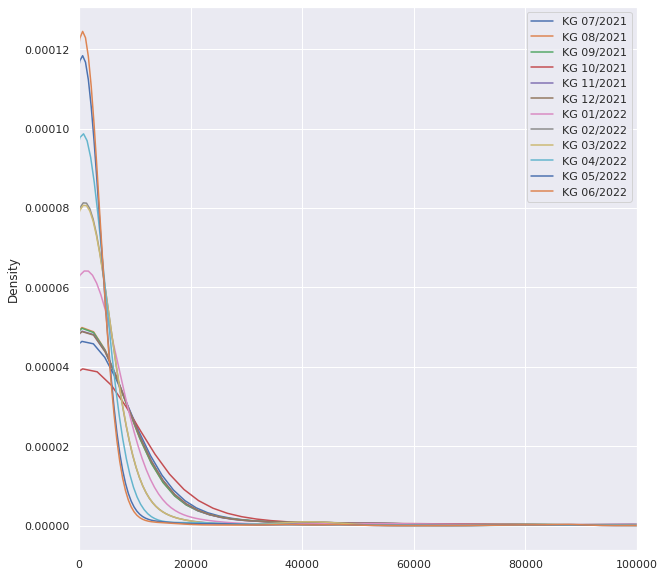

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
df[qty].plot.kde(ax=ax)
ax.set_xlim(0,1e5)

<a name='x.2'></a>

## 1.2 Modeling

[back to top](#top)

<a name='x.2.1'></a>

### 1.2.1 Quantity-Only Models

[back to top](#top)

<a name='x.2.1.1'></a>

#### 1.2.1.1 Symbolic Models

[back to top](#top)

With this data, we see a basic trend. Jan, Apr, Jul, Oct are long months while the remaining are short months. We would like to base our predictions on these month-specific averages.

<a name='x.2.1.1.1'></a>

##### 1.2.1.1.1 3 mo. Rule-Based

[back to top](#top)

In [33]:
# restructure X
# 3 mo. 
# Xxx > next will be X
# xXx > next will be x
# xxX > next will be x

In [34]:
df.shape

(1578, 111)

In [35]:
X = []
y = []
for i in range(len(qty)-3):
  X.append(df[qty[i:i+3]].values)
  y.append(df[qty[i+3]].values)
X = np.array(X).reshape(df.shape[0]*np.array(X).shape[0],3)
y = np.array(y).reshape(df.shape[0]*np.array(y).shape[0],)

# drop 0's
X = X[np.where(~np.isnan(y))[0]]
y = y[np.where(~np.isnan(y))[0]]

labels = []
for row in X:
  labels.append("X: {}".format(np.array2string(row.round())))

In [36]:
def sym_model(X):
  y = []
  for row in X:
    if np.argmax(row) == 0:
      y_ = np.max(row)
    else:
      y_ = np.min(row)
    y.append(y_)
  return np.array(y)

In [37]:
pred = sym_model(X)
r2_score(y, pred)

0.31932991534622956

In [ ]:
fig = px.scatter(x=y, y=pred, hover_name=labels,
                 labels={
                     "y": "Prediction",
                     "x": "Actual"
                 })
fig.update_layout(
  autosize=False,
  width=800,
  height=500,
  title='R2: {:.3f}'.format(r2_score(y, pred))
  )

We can make slight improvements on this model by adjusting when to ignore or return 0s

In [ ]:
def sym_model(X):
  y = []
  for row in X:
    if all((row[1:]) == 0) or all((row.round()) == 0):
      y_ = 0
    elif np.argmax(row) == 0:
      y_ = np.max(row)
    else:
      try:
        y_ = np.min([i for i in row if round(i) > 0])
      except:
        print(row)
        y_ = 0
    y.append(y_)
  return np.array(y)

In [ ]:
pred = sym_model(X)
r2_score(y, pred)

0.40938759237473044

In [ ]:
fig = px.scatter(x=y, y=pred, hover_name=labels,
                 labels={
                     "y": "Prediction",
                     "x": "Actual"
                 })
fig.update_layout(
  autosize=False,
  width=800,
  height=500,
  title='R2: {:.3f}'.format(r2_score(y, pred))
  )

<a name='x.2.1.2.1'></a>

##### 1.2.1.1.2 6 mo. Rule-Based

[back to top](#top)

In [ ]:
def process_data(window=3):
  X = []
  y = []
  for i in range(len(qty)-window):
    X.append(df[qty[i:i+window]].values)
    y.append(df[qty[i+window]].values)
  X = np.array(X).reshape(df.shape[0]*np.array(X).shape[0],window)
  y = np.array(y).reshape(df.shape[0]*np.array(y).shape[0],)
  X = X[np.where(~np.isnan(y))[0]]
  y = y[np.where(~np.isnan(y))[0]]

  labels = []
  for row in X:
    labels.append("X: {}".format(np.array2string(row.round())))
  return X, y, labels

In [ ]:
X, y, labels = process_data(window=6)

In [ ]:
X.shape

(9468, 6)

In [ ]:
def sym_model6(X):
  y = []
  for row in X:
    if all((row[4:]) == 0) or all((row.round()) == 0):
      y_ = 0
    elif np.argmax(row) == 0:
      y_ = np.max(row)
    else:
      y_ = np.min([i for i in row if round(i) > 0])
    y.append(y_)
  return np.array(y)

In [ ]:
pred = sym_model6(X)
r2_score(y, pred)

-0.8023043158858196

In [ ]:
fig = px.scatter(x=y, y=pred, hover_name=labels,
                 labels={
                     "y": "Prediction",
                     "x": "Actual"
                 })
fig.update_layout(
  autosize=False,
  width=800,
  height=500,
  title='R2: {:.3f}'.format(r2_score(y, pred))
  )

<a name='x.2.1.2'></a>

#### 1.2.1.2 Random Forest

[back to top](#top)

Let's deviate from symbolic ai to a machine learning format. 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

<a name='x.2.1.2.1'></a>

##### 1.2.1.2.1 3 mo. Forest

[back to top](#top)

In [ ]:
X, y, labels = process_data(3)

In [ ]:
clf = RandomForestRegressor(n_estimators=10)
clf.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
pred = clf.predict(X)

In [ ]:
fig = px.scatter(x=y, y=pred, hover_name=labels,
                 labels={
                     "y": "Prediction",
                     "x": "Actual"
                 })
fig.update_layout(
  autosize=False,
  width=800,
  height=500,
  title='R2: {:.3f}'.format(r2_score(y, pred))
  )

<a name='x.2.1.2.2'></a>

##### 1.2.1.2.2 6 mo. Forest

[back to top](#top)

In [ ]:
X, y, labels = process_data(6)

In [ ]:
clf = RandomForestRegressor(n_estimators=10)
clf.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
pred = clf.predict(X)

In [ ]:
fig = px.scatter(x=y, y=pred, hover_name=labels,
                 labels={
                     "y": "Prediction",
                     "x": "Actual"
                 })
fig.update_layout(
  autosize=False,
  width=800,
  height=500,
  title='R2: {:.3f}'.format(r2_score(y, pred))
  )

<a name='x.2.2'></a>

### 1.2.2 Detailed Models

[back to top](#top)

In [ ]:
window=3
# def process_data(window=3):
X = []
y = []
for i in range(len(qty)-window):
  X.append(df[qty[i:i+window]].values)
  y.append(df[qty[i+window]].values)
X = np.array(X).reshape(df.shape[0]*np.array(X).shape[0],window)
y = np.array(y).reshape(df.shape[0]*np.array(y).shape[0],)
X = X[np.where(~np.isnan(y))[0]]
y = y[np.where(~np.isnan(y))[0]]

labels = []
for row in X:
  labels.append("X: {}".format(np.array2string(row.round())))
# return X, y, labels

In [ ]:
desc

['Item',
 'Manufacturing Line',
 'Market Segment',
 'Product Line',
 'Customer Name',
 'Customer Number',
 'Customer Group',
 'Plant']

In [ ]:
details = ['Customer Name', 'Product Line']
df

,Level Number,Item,Item Description,Plant,Other Attribute,Manufacturing Line,Technology,Market Segment,Market Sub Segment,Product Line,Customer Name,Customer Number,Customer Group,Customer Type,Ship To,Coutry,Sales Rep,Sales Manager,Price Type,Square Meters,KG Factor,LB factor,Material Cost,VOH Cost,FOH Cost,Labor Cost,Outside Processing,KG 07/2021,KG 08/2021,KG 09/2021,KG 10/2021,KG 11/2021,KG 12/2021,KG 01/2022,KG 02/2022,KG 03/2022,KG 04/2022,KG 05/2022,KG 06/2022,ASP 07/2021,...,DL 03/2022,DL 04/2022,DL 05/2022,DL 06/2022,VOH 07/2021,VOH 08/2021,VOH 09/2021,VOH 10/2021,VOH 11/2021,VOH 12/2021,VOH 01/2022,VOH 02/2022,VOH 03/2022,VOH 04/2022,VOH 05/2022,VOH 06/2022,FOH 07/2021,FOH 08/2021,FOH 09/2021,FOH 10/2021,FOH 11/2021,FOH 12/2021,FOH 01/2022,FOH 02/2022,FOH 03/2022,FOH 04/2022,FOH 05/2022,FOH 06/2022,User Forecast Array 03 07/2021,User Forecast Array 03 08/2021,User Forecast Array 03 09/2021,User Forecast Array 03 10/2021,User Forecast Array 03 11/2021,User Forecast Array 03 12/2021,User Forecast Array 03 01/2022,User Forecast Array 03 02/2022,User Forecast Array 03 03/2022,User Forecast Array 03 04/2022,User Forecast Array 03 05/2022,User Forecast Array 03 06/2022
0,1.0,1429923,SS30120UN1956 WHITE 6,STNC,355055_355055,SPM374013,SPM374013,Specialty Filtration,SFT FILTRATION,SFTFL AIR,HOLLINGSWORTH AND VOSE AIR FILTRATION,355055.0,HOLLINGSWORTH AND VOSE,TRADE,355055.0,US,THOMAS OLSEN,960*Keith Misukanis - SPEC,Fixed,1.9560,0.02345,0.05170,0.04,0.01,0.0,0.00,0.0,4396.755353,645.28186,1205.439843,2083.333333,2082.81263,2072.622348,1666.639857,1666.602573,1666.644004,0.000000,0.000000,0.000000,0.06638,...,0.00000,0.0,0.0,0.0,43.967554,6.452819,12.054398,20.833333,20.828126,20.726223,16.666399,16.666026,16.666440,0.00000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,187494.8978,27517.35009,51404.68415,88841.50675,88819.30192,88384.74831,71072.06214,71070.47219,71072.23899,0.0000,0.0000,0.0000
1,1.0,1429924,SS30120UN2108 WHITE 6,STNC,355055_355055,SPM374013,SPM374013,Specialty Filtration,SFT FILTRATION,SFTFL AIR,HOLLINGSWORTH AND VOSE AIR FILTRATION,355055.0,HOLLINGSWORTH AND VOSE,TRADE,355055.0,US,THOMAS OLSEN,960*Keith Misukanis - SPEC,Fixed,2.1080,0.02531,0.05580,0.04,0.03,0.0,0.01,0.0,4396.755354,645.28186,1205.439844,2083.333333,2082.81263,2072.622348,1666.639857,1666.602573,1666.644004,0.000000,0.000000,0.000000,0.07152,...,16.66644,0.0,0.0,0.0,131.902661,19.358456,36.163195,62.500000,62.484379,62.178670,49.999196,49.998077,49.999320,0.00000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,173716.1341,25495.13471,47627.01871,82312.65639,82292.08338,81889.46456,65849.06587,65847.59275,65849.22972,0.0000,0.0000,0.0000
2,1.0,1429932,SS30150UN0292 WHITE 6,STNC,354822_354822,SPM374013,SPM374013,Hygiene Nonwoven,HYN ADULT INCONTINENCE,HYNAI TOPSHEET,ESSITY CANADA INC,354822.0,ESSITY,TRADE,354822.0,CA,Dianna Hardee,419*Michelle Wilson - HYG,Fixed,0.2920,0.00438,0.00965,0.01,0.00,0.0,0.00,0.0,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,4112.426036,3289.940828,3289.940828,4112.426036,3289.940828,3289.940828,0.00000,...,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,938910.05380,751128.04300,751128.04300,938910.0538,751128.0430,751128.0430
3,1.0,1429933,SS30150UN2032 WHITE 6,STNC,355055_355055,SPM374013,SPM374013,Specialty Filtration,SFT FILTRATION,SFTFL AIR,HOLLINGSWORTH AND VOSE AIR FILTRATION,355055.0,HOLLINGSWORTH AND VOSE,TRADE,355055.0,US,THOMAS OLSEN,960*Keith Misukanis - SPEC,Fixed,2.0320,0.03045,0.06714,0.05,0.02,0.0,0.00,0.0,4396.755355,645.28186,1205.439843,2083.333333,2082.81263,2072.622348,1666.639857,1666.602573,1666.644005,0.000000,0.000000,0.000000,0.11690,...,0.00000,0.0,0.0,0.0,87.935107,12.905637,24.108797,41.666667,41.656253,41.452447,33.332797,33.332051,33.332880,0.00000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,144392.6225,21191.52248,39587.51538,68418.17186,684

<a name='x.3'></a>

## 1.3 Pipeline

[back to top](#top)

In [ ]:
from sklearn.pipeline import make_pipeline

def process_data(X, window=3):
  X_ = []
  y = []
  for i in range(X.shape[1]-window):
    X_.append(X[:, i:i+window])
    y.append(X[:, i+window])
  X_ = np.array(X_).reshape(X.shape[0]*np.array(X_).shape[0],window)
  y = np.array(y).reshape(X.shape[0]*np.array(y).shape[0],)
  X_ = X_[np.where(~np.isnan(y))[0]]
  y = y[np.where(~np.isnan(y))[0]]

  labels = []
  for row in X_:
    labels.append("X: {}".format(np.array2string(row.round())))
  return X_, y, labels

def CustomerForecaster(**kwargs):
    return make_pipeline(RandomForestRegressor(**kwargs))

In [ ]:
CustomerForecaster()

Pipeline(memory=None,
         steps=[('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
              'randomforestregressor__n_estimators': np.arange(5,50,5),
              'randomforestregressor__bootstrap': [True, False]
              }

grid = GridSearchCV(CustomerForecaster(), param_grid, cv=5)

In [ ]:
X = df[qty].values
np.random.seed(4)
np.random.shuffle(X)
X_train = X[:int(X.shape[0]*0.8),:]
X_test = X[int(X.shape[0]*0.8):,:]

In [ ]:
saved = {}
for window in range(2,12):
  X, y, labels = process_data(X_train, window)
  grid.fit(X, y)
  saved["window: {}".format(window)] = grid.best_params_
  saved["window: {}".format(window)]['best_score'] = grid.best_score_

In [ ]:
pd.DataFrame(saved).T.sort_values('best_score', ascending=False)

,randomforestregressor__bootstrap,randomforestregressor__n_estimators,best_score
window: 10,True,35,0.918396
window: 8,True,15,0.767647
window: 9,True,15,0.752379
window: 11,False,30,0.709499
window: 4,True,5,0.702954
window: 6,True,40,0.69652
window: 5,True,15,0.634602
window: 7,True,30,0.588157
window: 3,True,15,0.537917
window: 2,True,20,0.510321


In [ ]:
window = int(pd.DataFrame(saved).T.sort_values('best_score', ascending=False).index[0].split(' ')[1])
window

10

In [ ]:
est = pd.DataFrame(saved).T.sort_values('best_score', ascending=False).iloc[0]['randomforestregressor__n_estimators']
est

35

In [ ]:
# window = 2
# est = 35

In [ ]:
param_grid = {
              'randomforestregressor__n_estimators': np.arange(max([1,est-5]),est+5,1),
              'randomforestregressor__bootstrap': [True, False]
              }

grid = GridSearchCV(CustomerForecaster(), param_grid, cv=5)
X, y, labels = process_data(X_train, window)
grid.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              max_samples=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split=None,
                                                              min_samples_leaf=1,
                                      

In [ ]:
print(grid.best_params_, end='\n\n')
print(grid.best_score_)

{'randomforestregressor__bootstrap': True, 'randomforestregressor__n_estimators': 31}

0.9227261185473449


In [ ]:
X_, y_, labels = process_data(X_test, window=window)
pred = grid.best_estimator_.predict(X_)
fig = px.scatter(x=y_, y=pred, hover_name=labels,
                 labels={
                     "y": "Prediction",
                     "x": "Actual"
                 })
fig.update_layout(
  autosize=False,
  width=800,
  height=500,
  title='R2: {:.3f}'.format(r2_score(y_, pred))
  )

In [ ]:
# > predict enxt month based on prior 6
# > predict nect, nect month based prior 5 + last prediction
# > continue ...
# > project out indefinitely

### References

[back to top](#top)

* [Cloud Notebook Options with Microsoft](https://notebooks.azure.com/)